Libraries:

In [4]:
import os
from IPython.display import Audio
import librosa
import librosa.display as disp
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout, LSTM,TimeDistributed,Flatten,BatchNormalization
from tensorflow.keras.models import Sequential
from keras.layers.convolutional import Conv1D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns 

Implementation:

In [17]:
path='D:\\Voice_data\\'

def load_data(path):
    f_emotions=[]
    f_pathes=[]
    folders = os.listdir(path)
    for folder in folders:
        files = os.listdir(path + folder)
        for file in files:
            step=file.split('.')[0]
            step=file.split('-')[2]
            f_emotions.append(int(step))
            f_pathes.append(path + folder + os.sep + file)
    return [f_emotions,f_pathes]     

def get_emotions(number):
    info={1 :'neutral',
          2 :'calm',
          3 :'happy',
          4 :'sad',
          5 :'angry',
          6 :'fearful',
          7 :'disgust',
          8 :'surprised'}
    return info[number]
emotions,pathes = load_data(path)

In [6]:
def read_audio(path):
    data, sample_rate = librosa.load(path, duration=2.4, offset=0.6)
    return data, sample_rate

def draw_wave(path,data, sr):
    # data, sr=librosa.load(path)
    plt.figure(figsize=(10,4))
    plt.title('Audio wave ::'+path,size=12)
    disp.waveshow(data,sr=sr)
    plt.show()

def draw_spectogram(path,data, sr):
    plt.figure(figsize=(10,4))
    #data, sr=librosa.load(path)
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.title('spectogram for wave ::'+path,size=12)
    disp.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.show()
    
def add_noise(data, sr):
    noise=0.035*np.random.uniform()*np.amax(data)
    data+=noise*np.random.normal(size=data.shape[0])
    
    return data, sr

def shift(data,sr):
    shift_range=int(np.random.uniform(low=-5,high=5)*1000)
    shifted=np.roll(data,shift_range)
    
    return shifted, sr

def pitch(data,sr,factor=0.7):
    pitched=librosa.effects.pitch_shift(y=data,sr=sr,n_steps=factor)
    
    return pitched, sr

def stretch(data,sr, rate=0.85):
    stretched=librosa.effects.time_stretch(y=data,rate=rate)
    
    return stretched, sr

# feature Extraction MFCCs:

def feature_extraction(data,sr):
    mfcc = librosa.feature.mfcc(y=data, sr=sr)
    
    return mfcc

def processing_audio(data,sr,options):
    funcs=random.choice(options)
    
    if funcs== 'standard':
        processed=data
    else:
        processed, _=funcs(data,sr)
        
    return processed 

20
calm


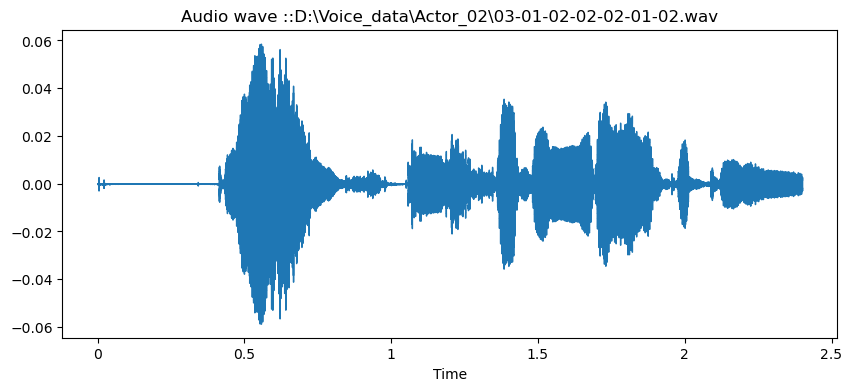

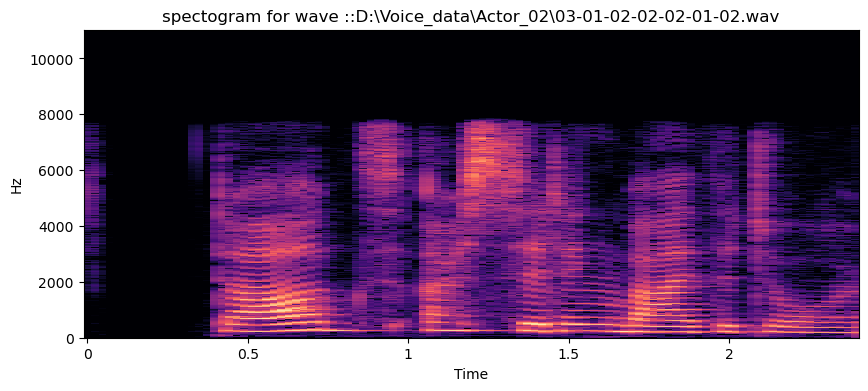

In [23]:
def get_features(path):
    data, sample_rate = read_audio(path)
    funcs = ['standard', add_noise, shift, pitch, stretch]
    features = []
    for _ in range(3):  # Augment data three times for each file
        func1_data = processing_audio(data, sample_rate, funcs)
        func2_data = processing_audio(func1_data, sample_rate, funcs)
        feature = feature_extraction(func2_data, sample_rate)
        if feature.shape == (20, 104):
            features.append(feature)
    return features

    return features
def display(number):
    data,sapmle_rate=read_audio(pathes[number])
    mfcc_features=feature_extraction(data,sapmle_rate) 
    print(len(mfcc_features))
    feature_extraction(data,sapmle_rate)
    print(get_emotions(emotions[number]))
    data,sapmle_rate=add_noise(data,sapmle_rate)
    data,sapmle_rate=shift(data,sapmle_rate)
    data,sapmle_rate=pitch(data,sapmle_rate)
    data,sapmle_rate=stretch(data,sapmle_rate)
    draw_wave(pathes[number],data,sapmle_rate)
    draw_spectogram(pathes[number],data,sapmle_rate)
    
    return data, sapmle_rate


d,sr=display(70)    
Audio(data=d,rate=sr)

In [8]:
for indx in range(len(pathes)):
    print(emotions[indx]) 

1
1
1
1
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
1
1
1
1
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
1
1
1
1
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
1
1
1
1
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
1
1
1
1
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
1
1
1
1
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
1
1
1
1
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
1
1
1
1
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
1
1
1
1
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3


In [9]:
encoder=OneHotEncoder()
encoder.fit_transform(np.array([1,2,3,4,5,6,7,8]).reshape(-1, 1)).toarray()

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [11]:
x=[]
y=[]
for indx in range(len(pathes)):
    value=get_features(pathes[indx])
    if value !=[]:
        for item in value:
            x.append(item)
            y.append(np.eye(8)[emotions[indx]-1])

In [12]:
x_train,x_test,y_train,y_test=train_test_split(np.array(x),np.array(y),test_size=0.2,random_state=11,shuffle=True)
print('train x shape',x_train.shape)
print('test x shape',x_test.shape)
print('train y shape',y_train.shape)
print('test y shape',y_test.shape)

train x shape (3451, 20, 104)
test x shape (863, 20, 104)
train y shape (3451, 8)
test y shape (863, 8)


In [13]:
trainX = np.expand_dims(x_train, axis=3)
trainX = np.expand_dims(trainX, axis=3)
trainX = np.swapaxes(trainX, 1 ,2)
print('train X:',trainX.shape)

#testX = np.expand_dims(x_test, axis=3)
#testX = np.expand_dims(testX, axis=3)
#trainX = np.swapaxes(testX, 1 ,2)
#print('test X:',testX.shape)
testX = np.expand_dims(x_test, axis=3)
testX = np.expand_dims(testX, axis=3)
testX = np.swapaxes(testX, 1, 2)  # Corrected line
print('test X:', testX.shape)


inputShape = trainX.shape[1:]
inputShape

train X: (3451, 104, 20, 1, 1)
test X: (863, 104, 20, 1, 1)


(104, 20, 1, 1)

Model:

In [24]:
def createModel(inputShape):
    model = Sequential()
    model.add(TimeDistributed(Conv1D(32, 3, padding='same', activation='relu'), input_shape=inputShape))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(Flatten()))

    model.add(LSTM(128, return_sequences=True))  # Increased LSTM units
    model.add(Dropout(0.5))  # Added Dropout layer

    model.add(LSTM(128))  # Added another LSTM layer
    model.add(Dropout(0.5))  # Added Dropout layer

    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(units=8, activation='softmax'))
    return model


In [21]:
model = createModel(inputShape)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_3 (TimeDis  (None, 104, 20, 1, 32)   128       
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 104, 20, 1, 32)   128       
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 104, 640)         0         
 tributed)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 104, 128)          393728    
                                                                 
 dropout_2 (Dropout)         (None, 104, 128)          0         
                                                      

Training:

In [25]:
opt = Adam(learning_rate=0.001)

model.compile(optimizer= opt,loss='categorical_crossentropy',
             metrics=['accuracy'])

reduce = ReduceLROnPlateau(monitor= '',factor=0.6,verbose=1,patience=5,min_lr=1e-8)
stop = EarlyStopping(monitor='val_los',patience=7)

hist= model.fit(trainX,y_train,batch_size=256,epochs=100,validation_data=(testX,y_test),callbacks=[reduce,stop])

Epoch 1/100
14/14 [==============================] - 36s 2s/step - loss: 2.0959 - accuracy: 0.1495 - val_loss: 2.0573 - val_accuracy: 0.1599 - lr: 0.0010
Epoch 2/100
14/14 [==============================] - 27s 2s/step - loss: 2.0353 - accuracy: 0.1649 - val_loss: 2.0334 - val_accuracy: 0.1634 - lr: 0.0010
Epoch 3/100
14/14 [==============================] - 27s 2s/step - loss: 1.9922 - accuracy: 0.2005 - val_loss: 2.0249 - val_accuracy: 0.1703 - lr: 0.0010
Epoch 4/100
14/14 [==============================] - 27s 2s/step - loss: 1.9583 - accuracy: 0.2069 - val_loss: 1.9641 - val_accuracy: 0.2514 - lr: 0.0010
Epoch 5/100
14/14 [==============================] - 27s 2s/step - loss: 1.8964 - accuracy: 0.2573 - val_loss: 1.9835 - val_accuracy: 0.2260 - lr: 0.0010
Epoch 6/100
14/14 [==============================] - 27s 2s/step - loss: 1.8534 - accuracy: 0.2605 - val_loss: 1.9676 - val_accuracy: 0.1958 - lr: 0.0010
Epoch 7/100
14/14 [==============================] - 27s 2s/step - loss: 1.7

Testing:

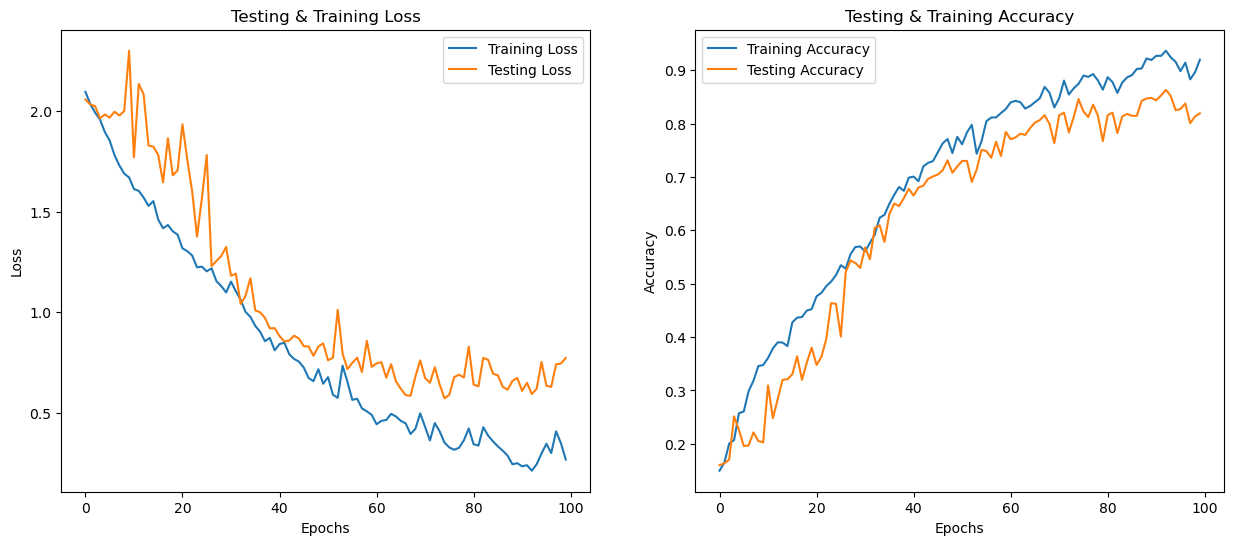

In [27]:
#print('The accuracy: ',model.evaluate(testx,y_test)[1]*100,'%')
train_loss=hist.history['loss']
test_loss=hist.history['val_loss']
train_accuracy=hist.history['accuracy']
test_accuracy=hist.history['val_accuracy']

epochs= [value for value in range(100)]

fig, ax = plt.subplots(1,2)

fig.set_size_inches(15,6)
ax[0].plot(epochs,train_loss,label='Training Loss')
ax[0].plot(epochs,test_loss,label='Testing Loss')
ax[0].set_title('Testing & Training Loss')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')



ax[1].plot(epochs,train_accuracy,label='Training Accuracy')
ax[1].plot(epochs,test_accuracy,label='Testing Accuracy')
ax[1].set_title('Testing & Training Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

model.save('D:\\emotions\\emotion_model2.h5')

In [28]:
emotion_model = load_model('D:\\emotions\\emotion_model2.h5')
y_pred = emotion_model.predict(testX)

27/27 [==============================] - 4s 89ms/step


In [29]:
predY=encoder.inverse_transform(y_pred)
testY=encoder.inverse_transform(y_test)

emotions_predict = [get_emotions(value) for value in predY.flatten()]
emotions_actual = [get_emotions(value) for value in testY.flatten()]

df = pd.DataFrame(columns=['Actual Emotions','Predicted Emotions'])

df['Actual Emotions'] = emotions_actual
df['Predicted Emotions'] = emotions_predict

df.head(10)

,Actual Emotions,Predicted Emotions
0,surprised,surprised
1,calm,calm
2,fearful,fearful
3,neutral,neutral
4,sad,sad
5,neutral,neutral
6,happy,sad
7,calm,neutral
8,sad,calm
9,sad,sad


Text(120.72222222222221, 0.5, 'Actual Emotions')

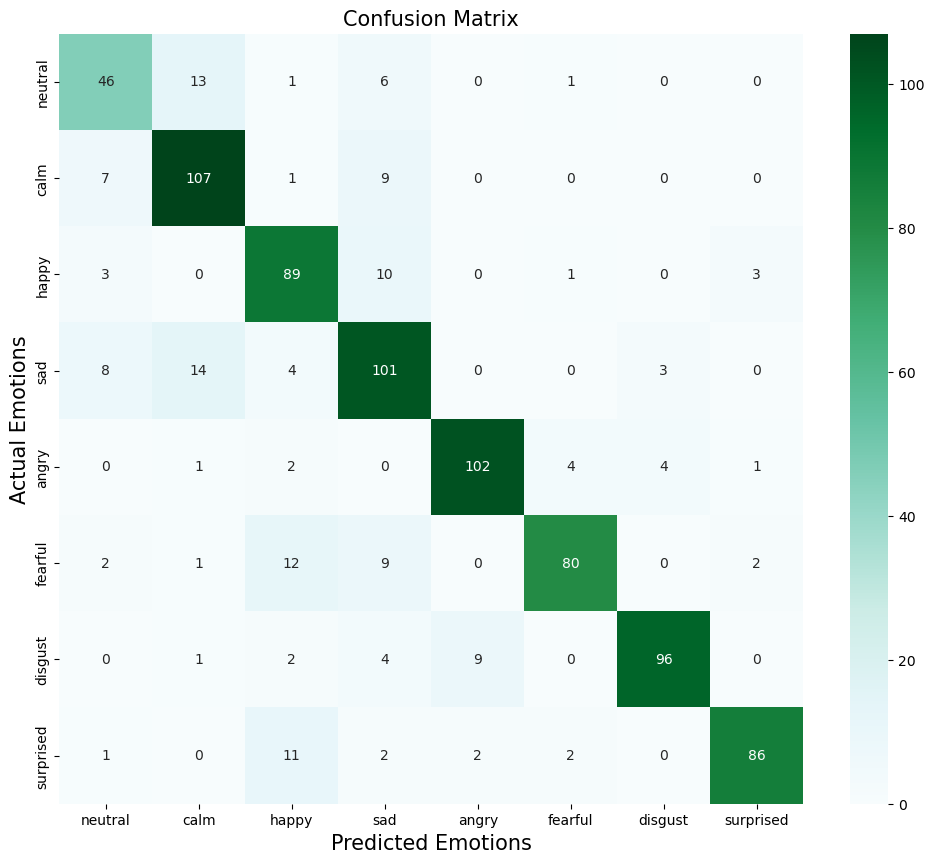

In [30]:
cm = confusion_matrix(testY,predY)

emts= [get_emotions(em) for em in encoder.categories_[0]]

cmt =pd.DataFrame(cm, index= emts, columns = emts)
plt.figure(figsize=(12,10))
sns.heatmap(cmt, annot=True, fmt='', cmap='BuGn')
plt.title('Confusion Matrix',size=15)
plt.xlabel('Predicted Emotions', size=15)
plt.ylabel('Actual Emotions', size=15)